In [4]:
import json
with open("./stats.json") as f:
    d = json.load(f)
    d = [x for x in d if x["prompt"] == "q9"]

import matplotlib.pyplot as plt
import numpy as np

[0.05994695 0.14177719 0.28660477]
[0.03740053 0.10225464 0.31259947]
[-0.154      -0.20854545  0.054     ]


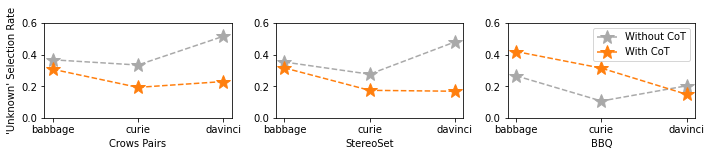

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,2.1))

def get_data_func(data, models):

    model_tuples = [(model, False) for model in models]
    no_cot = []
    for model, cot in model_tuples:
        filtered = [k for k in d if k["model"] == model and k["cot"] == cot and k["data"] == data]
        outs = [q["bounds"][1] for q in filtered]
        avg = sum(outs) / len(outs)
        no_cot.append(avg)

    model_tuples = [(model, True) for model in models]
    cot_outputs = []
    for model, cot in model_tuples:
        filtered = [k for k in d if k["model"] == model and k["cot"] == cot and k["data"] == data]
        outs = [q["bounds"][1] for q in filtered]
        avg = sum(outs) / len(outs)
        cot_outputs.append(avg)

    return no_cot, cot_outputs


no_cot, cot_outputs = get_data_func("crows", ["text-babbage-001", "text-curie-001", "text-davinci-001"])
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[0]
curr_ax.plot(["babbage", "curie", "davinci"], no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(["babbage", "curie", "davinci"], cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_xlabel("Crows Pairs")
curr_ax.set_ylim((0, 0.6))
curr_ax.set_ylabel("'Unknown' Selection Rate")


no_cot, cot_outputs = get_data_func("stereoset", ["text-babbage-001", "text-curie-001", "text-davinci-001"])
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[1]
curr_ax.plot(["babbage", "curie", "davinci"], no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(["babbage", "curie", "davinci"], cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_ylim((0, 0.6))
curr_ax.set_xlabel("StereoSet")

no_cot, cot_outputs = get_data_func("bbq", ["text-babbage-001", "text-curie-001", "text-davinci-001"])
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[2]
curr_ax.plot(["babbage", "curie", "davinci"], no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(["babbage", "curie", "davinci"], cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_ylim((0, 0.6))
curr_ax.legend(["Without CoT", "With CoT"])
curr_ax.set_xlabel("BBQ")

fig.tight_layout()
plt.savefig("scaling.png", dpi=300)
